# Multi Class Classification (having more than two labels in response variable)

In MNIST data set we have 10 labels in the response variable i.e. from 0 to 9. So, we have 10 nodes in the output layer since in multiclass classification the number of nodes in output layers is equal to the number of classes. And among them we consider only that class as a output which has highest probability.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()         # MNIST dataset is already present in the keras which load the data in the form of (x_train, y_train),(x_test,y_test)

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train.shape

(60000, 28, 28)

i.e. input training set of MNIST data set contains 60000 images of number from 0 to 9 with 28 pixels * 28 pixels (3D array)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

i.e. pixels value of first image

In [7]:
x_train[0].shape

(28, 28)

i.e. first image is 2D array with 28*28 pixels

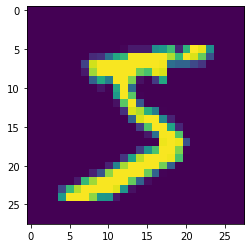

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

i.e. first number is 5

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

i.e. output of training set of MNIST Data set contains number from 0 to 9

pixels value in the array of the first image vary from 0 to 255. So, we divide each pixel with 255 so that each value come in the range of 0 to 1. By doing this, the weights can be assigned easily in the neural network algorithm and we can converge to the solution faster.

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flattening and Modeling

each x_train is present in 2D array (i.e. 28 * 28) but to give input to the first layer of neural network we have to flatten 2D to 1D by keeping all row of 2D array side by side (i.e. 28 * 28=784) 

In [13]:
model = Sequential()

In [14]:
model.add(Flatten(input_shape = (28,28)))          # it gives 784 input to the first layer

In [15]:
model.add(Dense(128, activation = 'relu'))      # we take 128 nodes in the first layer and here we don't have to specify the number of input since it automatically takes input from flatten. relu activation function perform better than sigmoid
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))    # in multiclassification we always use softmax activation function at the output layer to have best performance

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])         # in sparse_categorical_crossentropy we don't have to do label encoding whereas in categorical_crossentropy we have to do label encoding manually

// Note // In MultiClassification we always use Categorical Cross Entropy loss function (log loss function). We can also use Sparse Categorical Cross Entropy.

And if the target column has nominal variable then we first apply encoding on it if Categorical Cross Entropy is used. If Sparse Categorical Cross Entropy is used then we assign integer value to the nominal data i.e. 1,2,3 and so on

In [18]:
history = model.fit(x_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2807 - accuracy: 0.9179 - val_loss: 0.1487 - val_accuracy: 0.9573
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1188 - accuracy: 0.9645 - val_loss: 0.1210 - val_accuracy: 0.9638
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.1063 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0889 - val_accuracy: 0.9747
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.0955 - val_accuracy: 0.9742
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.1047 - val_accuracy:

In [19]:
model.layers[1].get_weights()

[array([[ 0.01994488, -0.01022476,  0.04698721, ...,  0.05773056,
         -0.02138327, -0.06584902],
        [-0.00209461, -0.01832289,  0.02987731, ..., -0.02339489,
         -0.0157308 , -0.03356166],
        [ 0.02776324, -0.07906077,  0.06744481, ...,  0.0202204 ,
          0.04893271,  0.01119413],
        ...,
        [-0.06258173, -0.05357765,  0.04351711, ...,  0.01101565,
         -0.02152896, -0.07855658],
        [ 0.05081856, -0.07016757, -0.04673562, ..., -0.06973244,
          0.0240558 , -0.06062588],
        [ 0.00817724,  0.01751984,  0.01148418, ...,  0.03632365,
         -0.06511626, -0.06089375]], dtype=float32),
 array([-0.07588982,  0.06697131,  0.0625447 , -0.1697792 , -0.14950822,
        -0.02855461,  0.06115026, -0.0052922 , -0.21082543,  0.11764156,
         0.14227967, -0.07013196, -0.00479573,  0.08533227,  0.0129625 ,
        -0.04516822, -0.26944458, -0.15882087,  0.20318802, -0.1696869 ,
        -0.08610659, -0.05365609, -0.0082022 ,  0.07097542, -0.109

In [20]:
model.layers[2].get_weights()

[array([[ 0.41983756,  0.3099758 , -0.2096044 , ...,  0.30549166,
          0.22477967,  0.19495802],
        [ 0.10360929,  0.13840427,  0.1247846 , ...,  0.26842347,
          0.07668174, -0.00867488],
        [-0.16537282,  0.06828619, -0.0136615 , ..., -0.04308242,
          0.4941623 , -0.14248116],
        ...,
        [ 0.19407658,  0.05783115, -0.01041102, ..., -0.09923702,
         -0.08816029,  0.36127442],
        [ 0.04911445,  0.03127518,  0.04294895, ...,  0.5351144 ,
          0.2837621 , -0.40201336],
        [ 0.16314667,  0.351408  , -0.27957523, ..., -0.04757562,
          0.36884975, -0.10028154]], dtype=float32),
 array([ 0.06031964,  0.04737858,  0.01640906,  0.2527421 ,  0.3954066 ,
         0.11619715, -0.22407527, -0.11712147, -0.14790916,  0.36099195,
        -0.23806083,  0.23828457,  0.18274802, -0.06657751, -0.06286743,
        -0.11726723,  0.05205877, -0.09141297,  0.27510735,  0.24337667,
         0.36508164,  0.13968942, -0.15603295, -0.16004951,  0.063

In [21]:
model.layers[3].get_weights()

[array([[-0.5214167 ,  0.28148767,  0.27945876,  0.49358717, -0.63985205,
          0.34440142, -0.38569432,  0.23129784,  0.3388352 , -0.44791046],
        [ 0.05395444, -0.66418284, -0.1833129 ,  0.4319773 ,  0.28480524,
         -0.06790912,  0.03294611,  0.21848352, -0.54583555, -0.7958253 ],
        [ 0.21198316,  0.12331011,  0.43526843, -0.36644024,  0.60236377,
         -0.05633353,  0.21586093, -0.70008224, -0.71981496,  0.41702783],
        [ 0.2501968 , -0.48951635, -0.23731183,  0.2729288 , -0.55396146,
          0.09362675, -0.0599688 , -0.7370669 ,  0.19819902,  0.337581  ],
        [-0.9892988 , -0.938716  , -0.50049603,  0.12214144,  0.13083471,
          0.46757138, -0.2566604 , -0.17280492,  0.12667601,  0.08286124],
        [ 0.27309126, -1.285119  , -0.7211471 , -0.3559187 , -0.8546864 ,
          0.50484705, -0.7105661 , -0.29173243,  0.05642135, -0.09643008],
        [ 0.22364976, -0.41766152,  0.56040645, -0.11446477, -0.75633097,
         -0.43420148,  0.4038230

In [22]:
y_prob = model.predict(x_test)
y_prob

313/313 [==============================] - 1s 3ms/step


array([[1.1666541e-16, 1.0786748e-15, 4.8609063e-14, ..., 1.0000000e+00,
        6.7595757e-17, 2.9775298e-13],
       [1.8199880e-25, 3.0529303e-12, 1.0000000e+00, ..., 2.8202478e-27,
        1.3970374e-16, 7.7594449e-25],
       [6.3178311e-15, 9.9999988e-01, 3.5068020e-09, ..., 2.2463244e-08,
        1.3361576e-07, 5.6504363e-12],
       ...,
       [4.5001064e-22, 1.7607720e-18, 7.2271060e-26, ..., 1.9040714e-13,
        1.8737969e-17, 2.9976683e-09],
       [6.7784356e-29, 3.7593579e-32, 5.0168812e-37, ..., 5.0017445e-23,
        4.0455318e-16, 1.8339847e-30],
       [1.0014061e-20, 7.6625290e-31, 6.8528145e-23, ..., 2.6798491e-36,
        2.3450087e-19, 5.1187404e-14]], dtype=float32)

it gives the probability for each number from 0 to 9 and for 10,000 images

but we have to show the actual number between 0 to 9 in the output and for this we have to find the index position of highest probability for each images and this index position is itself is the y_pred

In [23]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

this shows that our first image is 7, second image is 2 and so on...

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.9707

In [26]:
import matplotlib.pyplot as plt

In [27]:
history.history

{'loss': [0.28074944019317627,
  0.11882361024618149,
  0.07952965050935745,
  0.06241269037127495,
  0.04660361260175705,
  0.03828348219394684,
  0.02948812022805214,
  0.025875035673379898,
  0.022244147956371307,
  0.017957812175154686,
  0.018214527517557144,
  0.016788510605692863,
  0.014930478297173977,
  0.01332017220556736,
  0.010393143631517887,
  0.012474807910621166,
  0.010531892068684101,
  0.011145399883389473,
  0.009017071686685085,
  0.0073721325024962425,
  0.006972880102694035,
  0.011324651539325714,
  0.008924895897507668,
  0.006931339856237173,
  0.008732604794204235],
 'accuracy': [0.9179375171661377,
  0.9645208120346069,
  0.9754999876022339,
  0.9808750152587891,
  0.9851041436195374,
  0.987458348274231,
  0.9904166460037231,
  0.9913541674613953,
  0.9924166798591614,
  0.9940624833106995,
  0.9940624833106995,
  0.9945833086967468,
  0.9947916865348816,
  0.9957916736602783,
  0.996874988079071,
  0.9958124756813049,
  0.9965416789054871,
  0.9959791898

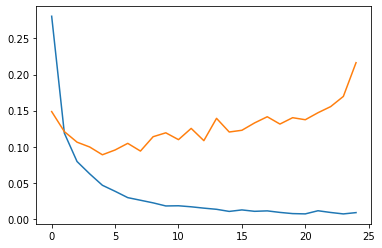

In [28]:
plt.plot(history.history['loss'])    # it gives how our training loss reduces while going from 1 to 25 epochs
plt.plot(history.history['val_loss'])

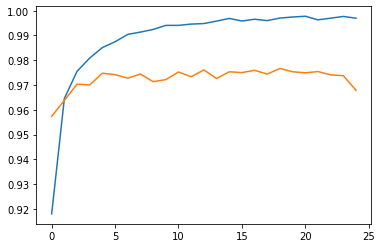

In [29]:
plt.plot(history.history['accuracy'])    # it gives how our training accuracy increases while going from 1 to 25 epochs
plt.plot(history.history['val_accuracy'])

from the graph we can see that the increasing of accuracy for both train and test data deviate somewhat and so there is small chances of overfitting.

In [33]:
y_test[0]

7

OR

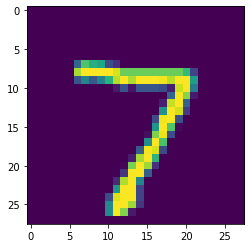

In [38]:
plt.imshow(x_test[0])

In [40]:
model.predict(x_test[0])       # i.e. we are giving only one image of 28 * 28

1/1 [==============================] - 0s 26ms/step


array([[1.1666408e-16, 1.0786624e-15, 4.8608876e-14, 2.7686325e-13,
        4.8096437e-27, 1.8685067e-18, 4.6114510e-28, 1.0000000e+00,
        6.7595241e-17, 2.9775016e-13]], dtype=float32)

In [41]:
model.predict(x_test[0]).argmax(axis = 1)

1/1 [==============================] - 0s 37ms/step


array([7], dtype=int64)

this shows that we are getting correct output and so our model is working fine